# NLP Toolkits and Preprocessing Exercises

## Introduction

We will be using [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) to practice preprocessing text data. The dataset contains user reviews for many products, but today we'll be focusing on the product in the dataset that had the most reviews - an oatmeal cookie. 

The following code will help you load in the data. If this is your first time using nltk, you'll to need to pip install it first.

In [131]:
import nltk
# nltk.download() <-- Run this if it's your first time using nltk to download all of the datasets and models

import pandas as pd

In [154]:
data = pd.read_csv('../data/cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

In [155]:
#1  How many reviews there are in total
total_no_of_reviews=len(data['reviews'])
f'The total number of reviews {total_no_of_reviews}'

'The total number of reviews 913'

In [134]:
#2 The percent of 1, 2, 3, 4 and 5 star reviews.
data['stars'].value_counts(normalize=True)*100

5    68.346112
4    23.767798
3     6.133625
2     1.314348
1     0.438116
Name: stars, dtype: float64

In [135]:
#3 The distribution of character lengths for the reviews, 
data['character lengths']= data['reviews'].apply(len)
data.head()

,user_id,stars,reviews,character lengths
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...,135
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...,1316
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...,261
3,A31CYJQO3FL586,5,I participated in a product review that includ...,530
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...,169


[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED2342BF98>]]


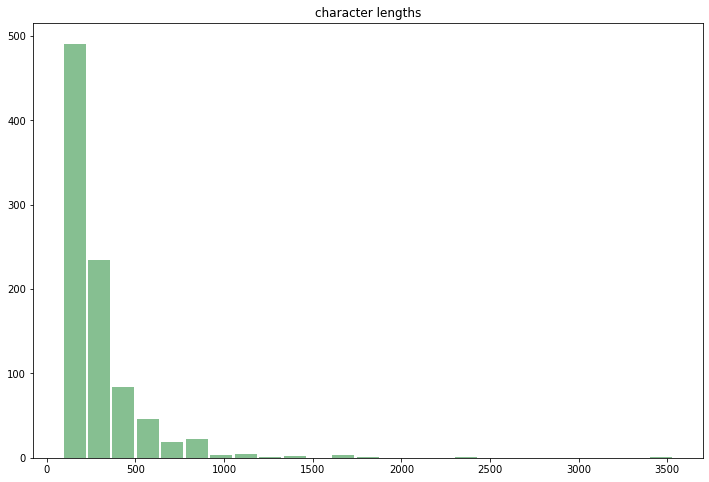

In [9]:
#Listing the values and  plot a histogram of the character reviews
ax = data.hist(column='character lengths', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
print(ax)

## Question 2 ##

* Apply the following preprocessing steps:

     1. Remove all words that contain numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Tokenize the reviews into words
     
  Hint #1: Use regular expressions.
  
  Hint #2: The cookie review in the second row has numbers, upper case letters and punctuation. You can use it to test out your regular expressions.
     
     
* Find the most common words.
* Determine the word length distribution over the entire corpus.

In [156]:
#Remove all words that contain numbers,punctuation,make all text lowercase,Tokenize the reviews into words
from nltk.tokenize import sent_tokenize
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

import re

def tokenization_s(sentences): # same can be achieved for words tokens
    s_new = []
    
    for sent in (sentences): #For NumpY = sentences[:]
            s_token = sent_tokenize(sent)
            if s_token != '':
                s_new.append(s_token)
    return s_new

sentence=tokenization_s(data['reviews'])


#Remove all words that contain numbers,punctuation,tag,make all text lowercase
def preprocess(text):
    clean_data = []
    
    for x in text: #this is Df_pd for Df_np (text[:])
        for i in x: 
            new_text = re.sub(r'\d+','',i)# remove numbers
            new_text = re.sub('<.*?>', '', new_text)   # remove HTML tags
            new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
            new_text = new_text.lower() # lower case, .upper() for upper          
            if new_text != '':
               clean_data.append(new_text)
    return clean_data

preprocess_sent=preprocess(sentence)


def tokenization_w(words):
    w_new = []
    for w in words:  # for NumPy = words[:]
        w_token = word_tokenize(w)
        if w_token != '':
            w_new.append(w_token)
    return w_new


tokenized_words=tokenization_w(preprocess_sent)

tokenized_words


[['i', 'love', 'these', 'cookies'],
 ['not',
  'only',
  'are',
  'they',
  'healthy',
  'but',
  'they',
  'taste',
  'great',
  'and',
  'are',
  'so',
  'soft'],
 ['i', 'will', 'definitely', 'add', 'these', 'to', 'my', 'grocery', 'list'],
 ['quaker',
  'soft',
  'baked',
  'oatmeal',
  'cookies',
  'with',
  'raisins',
  'are',
  'a',
  'delicious',
  'treat',
  'great',
  'for',
  'anytime',
  'of',
  'day'],
 ['for',
  'exampleat',
  'breakfast',
  'i',
  'had',
  'one',
  'with',
  'a',
  'large',
  'banana',
  'and',
  'a',
  'cup',
  'of',
  'coffee',
  'and',
  'felt',
  'id',
  'had',
  'a',
  'relatively',
  'healthy',
  'start',
  'to',
  'the',
  'daythe',
  'next',
  'day',
  'at',
  'lunch',
  'following',
  'a',
  'tuna',
  'sandwich',
  'i',
  'had',
  'one',
  'with',
  'a',
  'glass',
  'of',
  'milk',
  'and',
  'was',
  'satisfied',
  'enough',
  'to',
  'not',
  'need',
  'a',
  'snack',
  'before',
  'dinner',
  'at',
  'the',
  'following',
  'night',
  'after',

## Question 3 ##

* Apply the following preprocessing techniques:

     * Remove stopwords
     * Perform parts of speech tagging
     * Perform stemming
     * Optional: Perform lemmatization

  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

In [166]:
#Remove stopwords, Perform parts of speech tagging,Perform stemming, Optional: Perform lemmatization
print(tokenized_words)
from nltk.corpus import stopwords
stop=stopwords.words('english')

list_word_without_stop_word=[]
for word in tokenized_words:
    for x in word:
        if x != '' and x not in stop:
            list_word_without_stop_word.append(x)

print(list_word_without_stop_word)


[['i', 'love', 'these', 'cookies'], ['not', 'only', 'are', 'they', 'healthy', 'but', 'they', 'taste', 'great', 'and', 'are', 'so', 'soft'], ['i', 'will', 'definitely', 'add', 'these', 'to', 'my', 'grocery', 'list'], ['quaker', 'soft', 'baked', 'oatmeal', 'cookies', 'with', 'raisins', 'are', 'a', 'delicious', 'treat', 'great', 'for', 'anytime', 'of', 'day'], ['for', 'exampleat', 'breakfast', 'i', 'had', 'one', 'with', 'a', 'large', 'banana', 'and', 'a', 'cup', 'of', 'coffee', 'and', 'felt', 'id', 'had', 'a', 'relatively', 'healthy', 'start', 'to', 'the', 'daythe', 'next', 'day', 'at', 'lunch', 'following', 'a', 'tuna', 'sandwich', 'i', 'had', 'one', 'with', 'a', 'glass', 'of', 'milk', 'and', 'was', 'satisfied', 'enough', 'to', 'not', 'need', 'a', 'snack', 'before', 'dinner', 'at', 'the', 'following', 'night', 'after', 'dinner', 'i', 'had', 'one', 'with', 'the', 'remainder', 'of', 'my', 'glass', 'of', 'wine'], ['delicious'], ['and', 'again', 'didnt', 'feel', 'the', 'need', 'to', 'snack',

In [167]:
#Perform stemming

from nltk.stem.snowball import SnowballStemmer


snowball = SnowballStemmer(language = 'english')

stem_words=[]
for word in list_word_without_stop_word:
     stem_words.append(snowball.stem(word))

stem_words


['love',
 'cooki',
 'healthi',
 'tast',
 'great',
 'soft',
 'definit',
 'add',
 'groceri',
 'list',
 'quaker',
 'soft',
 'bake',
 'oatmeal',
 'cooki',
 'raisin',
 'delici',
 'treat',
 'great',
 'anytim',
 'day',
 'exampleat',
 'breakfast',
 'one',
 'larg',
 'banana',
 'cup',
 'coffe',
 'felt',
 'id',
 'relat',
 'healthi',
 'start',
 'dayth',
 'next',
 'day',
 'lunch',
 'follow',
 'tuna',
 'sandwich',
 'one',
 'glass',
 'milk',
 'satisfi',
 'enough',
 'need',
 'snack',
 'dinner',
 'follow',
 'night',
 'dinner',
 'one',
 'remaind',
 'glass',
 'wine',
 'delici',
 'didnt',
 'feel',
 'need',
 'snack',
 'later',
 'eveningeach',
 'cooki',
 'individu',
 'packag',
 'textur',
 'soft',
 'moist',
 'right',
 'amount',
 'sweet',
 'natur',
 'flavor',
 'use',
 'make',
 'cinnamon',
 'spice',
 'flavor',
 'give',
 'cooki',
 'real',
 'oldfashion',
 'homemad',
 'tastenutrit',
 'cooki',
 'calori',
 'g',
 'satur',
 'fat',
 'mg',
 'sodium',
 'g',
 'sugar',
 'also',
 'g',
 'protein',
 'contain',
 'g',
 'fiberw

In [168]:
# Perform lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


lemm_words_in_verbs=[]
for word in list_word_without_stop_word:
     lemm_words_in_verbs.append(lemmatizer.lemmatize(word, pos='v'))



lemm_words_in_noun=[]
for word in list_word_without_stop_word:
     lemm_words_in_noun.append(lemmatizer.lemmatize(word, pos='n'))



In [173]:
# Create a list of lemmatizer names for display
lemmatizer_names = ['NOUN LEMMATIZER', 'VERB LEMMATIZER']
formatted_text = '{:>24}' * (len(lemmatizer_names) + 1)
print('\n', formatted_text.format('INPUT WORD', *lemmatizer_names),'\n', '='*75)

#Iterate through the words and lemmatize the words using Noun and Verb lemmatizers:
# Lemmatize each word and display the output
for word in list_word_without_stop_word:
    output = [word, lemmatizer.lemmatize(word, pos='n'),lemmatizer.lemmatize(word, pos='v')]
    print(formatted_text.format(*output))


               INPUT WORD         NOUN LEMMATIZER         VERB LEMMATIZER 
                    love                    love                    love
                 cookies                   cooky                 cookies
                 healthy                 healthy                 healthy
                   taste                   taste                   taste
                   great                   great                   great
                    soft                    soft                    soft
              definitely              definitely              definitely
                     add                     add                     add
                 grocery                 grocery                 grocery
                    list                    list                    list
                  quaker                  quaker                  quaker
                    soft                    soft                    soft
                   baked                   baked

            disappointed            disappointed              disappoint
                    bite                    bite                    bite
                    went                    went                      go
                 reached                 reached                   reach
                 another                 another                 another
                 another                 another                 another
                   tasty                   tasty                   tasty
                  turned                  turned                    turn
                    soon                    soon                    soon
                  cookie                  cookie                  cookie
                    gone                    gone                      go
                realized                realized                 realize
                  wanted                  wanted                    want
                 another                 another   

                     lot                     lot                     lot
               healthier               healthier               healthier
                 cookies                   cooky                 cookies
              definitely              definitely              definitely
              purchasing              purchasing                purchase
                     got                     got                     get
                     mom                     mom                     mom
                     vox                     vox                     vox
                     box                     box                     box
            influensters            influensters            influensters
                     try                     try                     try
                  little                  little                  little
                daughter                daughter                daughter
                     ate                     ate   

                     got                     got                     get
                     eat                     eat                     eat
                   super                   super                   super
               delicious               delicious               delicious
                    even                    even                    even
                 oatmeal                 oatmeal                 oatmeal
                  raisin                  raisin                  raisin
                    kind                    kind                    kind
                     gal                     gal                     gal
                   moist                   moist                   moist
               flavorful               flavorful               flavorful
                     buy                     buy                     buy
                  future                  future                  future
                     son                     son   

                 oatmeal                 oatmeal                 oatmeal
                  cookie                  cookie                  cookie
          influenstercom          influenstercom          influenstercom
                  review                  review                  review
                purposes                 purpose                 purpose
                  cookie                  cookie                  cookie
                    huge                    huge                    huge
                  hearty                  hearty                  hearty
               literally               literally               literally
                   first                   first                   first
                 oatmeal                 oatmeal                 oatmeal
                  cookie                  cookie                  cookie
                    ever                    ever                    ever
                    able                    able   

                 husband                 husband                 husband
                    kind                    kind                    kind
                    feel                    feel                    feel
                  guilty                  guilty                  guilty
                   didnt                   didnt                   didnt
                     lol                     lol                     lol
                  really                  really                  really
                    soft                    soft                    soft
                   yummy                   yummy                   yummy
                  making                  making                    make
              reconsider              reconsider              reconsider
                 keeping                 keeping                    keep
                   stock                   stock                   stock
               chocolate               chocolate   

                   gross                   gross                   gross
                    took                    took                    take
                    bite                    bite                    bite
                  amazed                  amazed                   amaze
                  please                  please                  please
                     try                     try                     try
                    wont                    wont                    wont
                  regret                  regret                  regret
                received                received                 receive
                  cookie                  cookie                  cookie
             influenster             influenster             influenster
                 testing                 testing                    test
                purposes                 purpose                 purpose
                    soon                    soon   

             influenster             influenster             influenster
                     mom                     mom                     mom
                  voxbox                  voxbox                  voxbox
                     try                     try                     try
                    kids                     kid                     kid
                     ate                     ate                     eat
                   loved                   loved                    love
                  asking                  asking                     ask
                      go                      go                      go
                   store                   store                   store
                     get                     get                     get
                   looks                    look                    look
                    like                    like                    like
                tomorrow                tomorrow   

## Question 4 ##

* After going through these preprocessing steps, what are the most common words now? Do they make more sense?